In [1]:
#import optimize_na_ga_v2 as opt
import numpy as np
import time
import generalized_genSim_shorten_time as ggsd
import generalized_genSim_shorten_time_HMM as ggsdHMM
from neuron import h, gui
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from scipy import optimize, stats
import bluepyopt as bpop
import bluepyopt.deapext.algorithms as algo
import vclamp_evaluator_HMM as vcl_ev
import pickle
import time
import numpy as np
from deap import tools
import random
from deap import base, creator
import multiprocessing
import eval_helper as eh
import scoring_functions_relative as sf
import curve_fitting as cf

In [2]:
gnorm_vec, v_vec, all_is = ggsdHMM.Activation(channel_name='na12mut8st').genActivation()

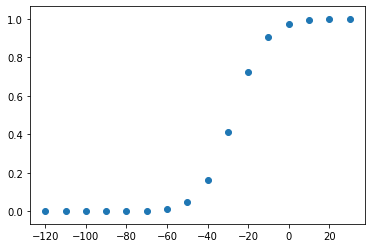

In [3]:
plt.scatter(v_vec, gnorm_vec)

In [4]:
evaluator = vcl_ev.Vclamp_evaluator_HMM('params_na12mut8st.csv', 'A427D', 'na12mut8st')

[-120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30]
[5.698261725497659e-06, 2.0975164738343892e-05, 7.720591616948255e-05, 0.0002841386530118304, 0.0010451273829635765, 0.003836397937480615, 0.01397813235922699, 0.04959533016235404, 0.16113625675207607, 0.41420600137495306, 0.7224382391037644, 0.905490949469194, 0.9724274536594357, 0.9923560547913437, 0.9979117976690491, 0.999431848730123]
[-120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30]
[1.0, 0.9924374821275395, 0.9747045298035445, 0.9332015381703531, 0.8425681527437866, 0.6759814604004654, 0.45341613147824883, 0.24958318710802563, 0.12091521871207588, 0.05760783505447354, 0.03058619410671593, 0.014432656624207002, 0.014376641087667539, 0.014351991202043623, 0.014340160234009513, 0.014333794593252715]


/global/u1/m/mikelam/vclamp/curve_fitting.py:27: RuntimeWarning: overflow encountered in exp
  return y0 + span_fast * (1 - np.exp(-k_fast * x)) + span_slow * (1 - np.exp(-k_slow * x))


In [5]:
gen_counter = 0
best_indvs = []
cp_freq = 1
old_update = algo._update_history_and_hof
def my_update(halloffame, history, population):
    global gen_counter,cp_freq
    #old_update(halloffame, history, population)
    if halloffame is not None:
        halloffame.update(population)
    #print('hof: ' + str(halloffame))
    #print('population: ' + str(population))
    
    if halloffame:
        best_indvs.append(halloffame[0])
    gen_counter = gen_counter+1
    print("Current generation: ", gen_counter)
    if gen_counter%cp_freq == 0:
        fn = '.pkl'
        save_logs(fn,best_indvs,population)

def my_record_stats(stats, logbook, gen, population, invalid_count):
    '''Update the statistics with the new population'''
    record = stats.compile(population) if stats is not None else {}
    logbook.record(gen=gen, nevals=invalid_count, **record)
    print('log: \n', logbook, '\n')
    output = open("log.pkl", 'wb')
    pickle.dump(logbook, output)
    output.close()

def save_logs(fn, best_indvs, hof):
    output = open("indv"+fn, 'wb')
    pickle.dump(best_indvs, output)
    output.close()
    output = open("hof"+fn, 'wb')
    pickle.dump(hof, output)


In [6]:
#hof = tools.HallOfFame(1, similar=np.array_equal)
hof = tools.ParetoFront()
algo._update_history_and_hof = my_update
algo._record_stats = my_record_stats
pool = multiprocessing.Pool(processes=64)
deap_opt = bpop.optimisations.DEAPOptimisation(evaluator, offspring_size=50, hof = hof, map_function=pool.map)
#deap_opt = bpop.optimisations.DEAPOptimisation(evaluator, offspring_size=5, hof = hof)
cp_file = './cp.pkl'

[-120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30]
[7.328827884852327e-06, 2.676134765718826e-05, 9.771451044841176e-05, 0.00035672081124301275, 0.0013013668780601612, 0.004735715565063525, 0.017078430358469836, 0.059661633594718336, 0.18810233056129746, 0.4582907148530174, 0.755457919582507, 0.918571851479631, 0.9762992288691958, 0.9933958039908061, 0.9981827035579387, 0.9995016696212395]
gv_slope: 7.721039265601109
v_half_act: -28.708843402358216
[-120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30]
[-120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30]
[5.650946147421487e-06, 2.080649376731241e-05, 7.660532873093725e-05, 0.0002820032254096765, 0.0010375524070803822, 0.00380967137561442, 0.013885352758113268, 0.04929033081639905, 0.16029651852982796, 0.41276026602005333, 0.7212943533508032, 0.9050249613857076, 0.9722885172683846, 0.9923187571943046, 0.9979021041829594, 0.9994293579554709]
[6.312290584855443e

/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:144: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))


[-120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30]
[1.9936989561372298e-05, 7.202184566613889e-05, 0.00026014160776791713, 0.0009391652895030361, 0.003384581585264408, 0.012120172171212543, 0.042442112864533046, 0.13802394770534973, 0.36647817275910394, 0.6763590394226601, 0.883039544923489, 0.9646333532823937, 0.9899534008250934, 0.9971987056612399, 0.9992230158133881, 0.9997848065751981]
gv_slope: 8.115751756410292
[-120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30]
gv_slope: 8.093354896002197
[6.100023055523196e-06, 2.1262376598010044e-05, 7.41098216767027e-05, 0.0002582751887498409, 0.000899685828614796, 0.003129015067034962, 0.010822555419869621, 0.03673567338455961, 0.11733446846474829, 0.3166400670637109, 0.6176075415783464, 0.8491650674536029, 0.9515116921878096, 0.9855910368930119, 0.995823318476834, 0.9987981787006315]
[-120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30]
gv_slope: 7.9352418998111

/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


[-120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30]
[-120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30]
[-120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30]
[-120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30]
[1.0, 0.9935597230435607, 0.9783743326080662, 0.942520723038743, 0.8627018096133, 0.7101934346544078, 0.4906389056331349, 0.27786124034970805, 0.13675542363684773, 0.06493803590332732, 0.03343555296662876, 0.016151964889997737, 0.016059420619542835, 0.016019138699593385, 0.016000127523026538, 0.015990101319799027]
[1.0, 0.9962595776320319, 0.9875917320887609, 0.966911870155903, 0.9185568450120899, 0.8151035377419937, 0.6353712402901488, 0.4084343998190155, 0.21713687876713927, 0.10453560371097408, 0.050382386081135676, 0.02549560811353088, 0.024953463395871626, 0.02472491206408084, 0.024622913665236362, 0.024572934566714194]
[1.0, 0.9958365629058679, 0.9860256353803547, 0.962

/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


[-120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30]
[-120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30]
[1.0, 0.9968549748879407, 0.9894921041679854, 0.9717987867880207, 0.929974019215431, 0.8384190165419058, 0.6706596055982366, 0.44539863792519463, 0.24386940266407392, 0.11847323244701713, 0.05703897032396769, 0.028839691370554005, 0.028015681682380042, 0.027670322722807644, 0.02751807852200402, 0.02744480876183645]
[1.0, 0.9877626367482469, 0.9590468025713015, 0.8938954449957434, 0.7627790155618898, 0.5561087729843613, 0.33451078122629807, 0.16978177282366894, 0.08091733067695854, 0.04251138982541344, 0.022086222845300457, 0.010079260438806097, 0.010069684068962496, 0.01006528130275401, 0.010063035121526136, 0.010061743676917733]


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_sh

((-36.268102211978466 - -31.1293425740597)/-31.1293425740597)**2 = 0.027250640284297016


/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


((-35.07562023785863 - -31.1293425740597)/-31.1293425740597)**2 = 0.016070721723953994
((-25.502862634946066 - -31.1293425740597)/-31.1293425740597)**2 = 0.03266883533216354
((-26.69965437639128 - -31.1293425740597)/-31.1293425740597)**2 = 0.020249132286519245


/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


((-35.73858298629805 - -31.1293425740597)/-31.1293425740597)**2 = 0.021923951076545222


/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


((-32.2548136959707 - -31.1293425740597)/-31.1293425740597)**2 = 0.0013071601949316476
Couldn't fit curve to recovery.
((-30.94082560239584 - -31.1293425740597)/-31.1293425740597)**2 = 3.6674230615577173e-05
((-18.560387066506543 - -31.1293425740597)/-31.1293425740597)**2 = 0.1630266033351568


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


((-27.75081355306278 - -31.1293425740597)/-31.1293425740597)**2 = 0.01177918953452282
((-21.38428133074804 - -31.1293425740597)/-31.1293425740597)**2 = 0.0980007158297389


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


((-18.635204468695942 - -31.1293425740597)/-31.1293425740597)**2 = 0.1610915301131556
((-25.971071866437242 - -31.1293425740597)/-31.1293425740597)**2 = 0.027457966001009956
((-24.531148538891426 - -31.1293425740597)/-31.1293425740597)**2 = 0.04492729466633916
((-18.690024317196308 - -31.1293425740597)/-31.1293425740597)**2 = 0.15968100631015697
Couldn't fit curve to recovery.
((-31.482509697348338 - -31.1293425740597)/-31.1293425740597)**2 = 0.00012871247399484412
((-26.33185717254353 - -31.1293425740597)/-31.1293425740597)**2 = 0.02375130223421867
((-27.08401013966595 - -31.1293425740597)/-31.1293425740597)**2 = 0.01688762339758382
Couldn't fit curve to recovery.
((-32.07859177936375 - -31.1293425740597)/-31.1293425740597)**2 = 0.0009298664678191502
((-30.25113318826869 - -31.1293425740597)/-31.1293425740597)**2 = 0.0007958958695962219
((-25.865544170863227 - -31.1293425740597)/-31.1293425740597)**2 = 0.02859292586984441


/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


((-33.022852366500366 - -31.1293425740597)/-31.1293425740597)**2 = 0.003699944530876328
Couldn't fit curve to recovery.
((-29.107526840617847 - -31.1293425740597)/-31.1293425740597)**2 = 0.00421835617084303
((-28.708843402358216 - -31.1293425740597)/-31.1293425740597)**2 = 0.006046025562591146
((-19.752158196025057 - -31.1293425740597)/-31.1293425740597)**2 = 0.13357638777116512
((-18.887725433769006 - -31.1293425740597)/-31.1293425740597)**2 = 0.15464564266865846
((-21.045984476286765 - -31.1293425740597)/-31.1293425740597)**2 = 0.1049229479304785
((-24.514635414221953 - -31.1293425740597)/-31.1293425740597)**2 = 0.045152452752971105
((-25.754229024795546 - -31.1293425740597)/-31.1293425740597)**2 = 0.029815039471156452
((-24.303343396960734 - -31.1293425740597)/-31.1293425740597)**2 = 0.048083111723251255
((-27.295145865615588 - -31.1293425740597)/-31.1293425740597)**2 = 0.015170813951107582


/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


((-32.395288412153064 - -31.1293425740597)/-31.1293425740597)**2 = 0.0016538280477717067
((-26.847000890132186 - -31.1293425740597)/-31.1293425740597)**2 = 0.01892442683532629
((-18.116079514988012 - -31.1293425740597)/-31.1293425740597)**2 = 0.17475617092219461
((-27.104978758319643 - -31.1293425740597)/-31.1293425740597)**2 = 0.01671300616074529
((-25.668286931186795 - -31.1293425740597)/-31.1293425740597)**2 = 0.030776080234114305
Couldn't fit curve to recovery.
((-32.765337858951135 - -31.1293425740597)/-31.1293425740597)**2 = 0.002762003328619154
((-26.102218969830236 - -31.1293425740597)/-31.1293425740597)**2 = 0.02607949811796027
((-20.909304505807093 - -31.1293425740597)/-31.1293425740597)**2 = 0.10778668846965207
((-23.839356372306494 - -31.1293425740597)/-31.1293425740597)**2 = 0.05484202910598329
((-27.749311090681914 - -31.1293425740597)/-31.1293425740597)**2 = 0.011789668488070988
((-27.601665764359883 - -31.1293425740597)/-31.1293425740597)**2 = 0.012842148352180954
((-18

/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


((-32.411521165025256 - -31.1293425740597)/-31.1293425740597)**2 = 0.0016965128143477254
((-19.552728636552505 - -31.1293425740597)/-31.1293425740597)**2 = 0.13830032582123994


/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


((-33.05878726501263 - -31.1293425740597)/-31.1293425740597)**2 = 0.0038417116951089646


/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


((-31.931639484095395 - -31.1293425740597)/-31.1293425740597)**2 = 0.0006642481315272432
((-23.03212690483672 - -31.1293425740597)/-31.1293425740597)**2 = 0.06765992562202462
[-120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30]
[8.72660965408263e-06, 3.164047629110545e-05, 0.00011471345107977127, 0.0004158062008504612, 0.0015059982097246326, 0.005438984746775717, 0.019443148864990677, 0.0670731681876033, 0.20677764910777446, 0.48590964538677717, 0.774117169202712, 0.9255175797125798, 0.9782866016500509, 0.9939157945236546, 0.9983145562216346, 0.9995345883178516]
[-120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30]
gv_slope: 7.763473830304323
[1.9788005124380247e-05, 7.147021502860625e-05, 0.00025810091466171164, 0.0009316276754287906, 0.0033568534089014413, 0.01201950502291397, 0.04209274014004236, 0.13697808176373202, 0.36438949152487776, 0.6743429293641632, 0.882066901544603, 0.9643053412554033, 0.989855863115975, 0.9971707771118171

/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:144: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))


v_half_act: -18.690024317196308
[-120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30]
v_half_act: -24.92873205124489
[-120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30]
gv_slope: 8.055295273478604
[-120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30]
v_half_act: -25.865544170863227
[-120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30]
[4.168130604083766e-06, 1.4302675126290736e-05, 4.907751087383863e-05, 0.00016838797075643242, 0.0005775819905242105, 0.00197917645581305, 0.006758960767785317, 0.02281818018546267, 0.07418406624249352, 0.2156604297817337, 0.48546712505105843, 0.7640189719340567, 0.9174224571875799, 0.9744396280411638, 0.9924137933796884, 0.997777278101812]
[4.244302788459026e-06, 1.4577830251190424e-05, 5.0068951003088835e-05, 0.00017195173866139956, 0.0005903584832063598, 0.0020248042253137783, 0.006920513497361888, 0.02337613251380328, 0.07596681412025372, 0.2201973425

/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1565: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))


[-120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30]
[-120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30]
[-120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30]
[1.0, 0.9887774212887682, 0.962369235134231, 0.902010603680481, 0.7785259846825803, 0.5780982276601931, 0.3522059236773191, 0.1814108846147205, 0.08632605385127043, 0.043874930509597544, 0.023351769892772153, 0.010673989529926946, 0.010661011983598697, 0.010655093876714757, 0.010652106777098049, 0.010650408117695236]
[-120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30]
[1.0, 0.9940750529859023, 0.9800501856524716, 0.9467871641290924, 0.8720677417844217, 0.7266870974708106, 0.5110681270815077, 0.2931133893618718, 0.14570354790029993, 0.0691469501379318, 0.0349537602353351, 0.01713606285587834, 0.01701737253303308, 0.01696597350194028, 0.016941912968487467, 0.01692935051519907]
[-120, -110, -100, -90, -80, -70, -60, -50, -40, -30

/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


[-120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30]
[1.0, 0.9940483088341786, 0.9799633909566888, 0.9465661007567407, 0.8715802232035184, 0.7258192870900128, 0.5099752247383404, 0.29221142357604635, 0.1452128644047661, 0.068915693482264, 0.034871312210957045, 0.017081296374225268, 0.016964164692110824, 0.01691342711193099, 0.01688966597130389, 0.016877253199898853]
[-120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30]
[1.0, 0.994054770985249, 0.9799843649268412, 0.9466195200515639, 0.8716980085270883, 0.7260288576043008, 0.5102389673843816, 0.2924289286635682, 0.14533115024757734, 0.06897143614677344, 0.034891195970760396, 0.01709448991689331, 0.016976983876719025, 0.016926087414295625, 0.01690225434772447, 0.016889805609365083]


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


((-35.667823131088724 - -31.1293425740597)/-31.1293425740597)**2 = 0.021255976479186985


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


((-23.75533402319608 - -31.1293425740597)/-31.1293425740597)**2 = 0.05611350232860335
((-26.569110368795226 - -31.1293425740597)/-31.1293425740597)**2 = 0.021460212447420437
Couldn't fit curve to recovery.
((-30.34961642393629 - -31.1293425740597)/-31.1293425740597)**2 = 0.000627399692660759
Couldn't fit curve to recovery.
((-29.562323713587446 - -31.1293425740597)/-31.1293425740597)**2 = 0.002534011313711797
((-25.561681048374407 - -31.1293425740597)/-31.1293425740597)**2 = 0.03198937485633823
((-28.629837863377848 - -31.1293425740597)/-31.1293425740597)**2 = 0.006447153664035057
((-26.644430459220075 - -31.1293425740597)/-31.1293425740597)**2 = 0.02075716208621083
((-29.016576487294316 - -31.1293425740597)/-31.1293425740597)**2 = 0.004606413672717602
((-21.38428133074804 - -31.1293425740597)/-31.1293425740597)**2 = 0.0980007158297389


/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


((-32.95376189014951 - -31.1293425740597)/-31.1293425740597)**2 = 0.0034348630464527117
((-27.00125100186728 - -31.1293425740597)/-31.1293425740597)**2 = 0.017585663042367094
((-26.035343252760775 - -31.1293425740597)/-31.1293425740597)**2 = 0.026777983390727064
((-23.170406798557565 - -31.1293425740597)/-31.1293425740597)**2 = 0.06536873831200132
((-19.752158196025057 - -31.1293425740597)/-31.1293425740597)**2 = 0.13357638777116512
((-20.039387583884203 - -31.1293425740597)/-31.1293425740597)**2 = 0.12691696243144726
Couldn't fit curve to recovery.
((-19.355931814083092 - -31.1293425740597)/-31.1293425740597)**2 = 0.14304236926607444
((-16.476522720173424 - -31.1293425740597)/-31.1293425740597)**2 = 0.22156569675258508
((-31.045830626191595 - -31.1293425740597)/-31.1293425740597)**2 = 7.197096556953856e-06
((-27.75081355306278 - -31.1293425740597)/-31.1293425740597)**2 = 0.01177918953452282
Couldn't fit curve to recovery.
((-28.574379418784634 - -31.1293425740597)/-31.1293425740597)**

/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


((-32.874720526531455 - -31.1293425740597)/-31.1293425740597)**2 = 0.00314368536786648
((-26.256985938276436 - -31.1293425740597)/-31.1293425740597)**2 = 0.024498429308539713
((-22.316566235461192 - -31.1293425740597)/-31.1293425740597)**2 = 0.08014669142451077
((-24.941766553352913 - -31.1293425740597)/-31.1293425740597)**2 = 0.03950946944503429
((-19.528399084172293 - -31.1293425740597)/-31.1293425740597)**2 = 0.13888224394962778
((-24.303343396960734 - -31.1293425740597)/-31.1293425740597)**2 = 0.048083111723251255


/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


((-36.166362129072915 - -31.1293425740597)/-31.1293425740597)**2 = 0.02618227476254419


/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


((-32.411521165025256 - -31.1293425740597)/-31.1293425740597)**2 = 0.0016965128143477254
((-24.887740064329865 - -31.1293425740597)/-31.1293425740597)**2 = 0.04020243121204541
((-24.514635414221953 - -31.1293425740597)/-31.1293425740597)**2 = 0.045152452752971105


/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


((-33.01676223873766 - -31.1293425740597)/-31.1293425740597)**2 = 0.003676182416579196
((-26.69965437639128 - -31.1293425740597)/-31.1293425740597)**2 = 0.020249132286519245
((-20.909304505807093 - -31.1293425740597)/-31.1293425740597)**2 = 0.10778668846965207


/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


((-32.395288412153064 - -31.1293425740597)/-31.1293425740597)**2 = 0.0016538280477717067
((-28.62741536929113 - -31.1293425740597)/-31.1293425740597)**2 = 0.0064596567491905475
((-33.857701408803564 - -31.1293425740597)/-31.1293425740597)**2 = 0.00768180146923857
((-29.28427628985719 - -31.1293425740597)/-31.1293425740597)**2 = 0.00351304771100149
((-18.116079514988012 - -31.1293425740597)/-31.1293425740597)**2 = 0.17475617092219461
((-22.98683179845288 - -31.1293425740597)/-31.1293425740597)**2 = 0.06841901007340095
((-18.635204468695942 - -31.1293425740597)/-31.1293425740597)**2 = 0.1610915301131556
((-18.560387066506543 - -31.1293425740597)/-31.1293425740597)**2 = 0.1630266033351568
((-24.92873205124489 - -31.1293425740597)/-31.1293425740597)**2 = 0.03967610293312578


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:144: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))


[-120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30]
[4.237070201105798e-06, 1.4551792033869051e-05, 4.9975413260966905e-05, 0.00017161642852718474, 0.00058915932187545, 0.002020531399247946, 0.006905416999941776, 0.02332410906267878, 0.07580107336412395, 0.2197776723426786, 0.49172324741426116, 0.768656824185081, 0.9194275756263407, 0.975118810371166, 0.9926253119727921, 0.9978414379213608]
gv_slope: 8.104696966476999
[-120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30]
v_half_act: -19.731653203544713
[-120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30]
[4.840043086829198e-06, 1.6707251016770623e-05, 5.766975826921563e-05, 0.00019904333930928684, 0.000686746843785663, 0.0023666112485369838, 0.008122225289390937, 0.027489823462937803, 0.08890056057772301, 0.25195690386064057, 0.5376109515366807, 0.800537892981171, 0.9326791120831069, 0.9795181515028504, 0.993978940480732, 0.9982482449877359]
[-120, -110, -100

/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:144: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))


[-120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30]
v_half_act: -32.95376189014951
gv_slope: 8.093354896002197
[-120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30]
[-120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30]
[-120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30]
v_half_act: -23.03212690483672
gv_slope: 7.947820981039953
v_half_act: -25.110638148183174
[-120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30]
[3.909652922876635e-06, 1.3395879649173336e-05, 4.5898054073309314e-05, 0.00015724725109683108, 0.0005385853592737951, 0.0018429965471164094, 0.00628671699515035, 0.021217115181395105, 0.06913883120130647, 0.2028646367878737, 0.46580906596926275, 0.7492338922964314, 0.9110107075795805, 0.9722815361276838, 0.9917483376435051, 0.9975775797083519]
[-120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30]
v_half_act: -20.1707903805312

/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:144: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))


[-120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30]
gv_slope: 8.066843943595856
[-120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30]
[-120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30]
v_half_act: -21.48336822789909
[6.327441430462975e-06, 2.2178400879351816e-05, 7.773472734125101e-05, 0.00027242031660695745, 0.000954228065328069, 0.0033367542468969395, 0.011598930997631303, 0.039508213605137954, 0.12601105726402587, 0.33571263597856493, 0.6391736810174803, 0.8612867050530914, 0.956070981321872, 0.9870611274664387, 0.9962741764818656, 0.9989342108036432]
[5.84647332650509e-06, 2.029234985950367e-05, 7.042959785405858e-05, 0.0002444129873653957, 0.0008478259783656125, 0.0029365845254398903, 0.010119225100392535, 0.03426623779841469, 0.10965129917609094, 0.29945633500920765, 0.5973731346462946, 0.8373922134426479, 0.9470182700252527, 0.9841372383037638, 0.9953776123864873, 0.9986638562586223]
[4.1587226058577

/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


((-20.902321927764117 - -31.1293425740597)/-31.1293425740597)**2 = 0.10793402374695583
((-21.21660140956683 - -31.1293425740597)/-31.1293425740597)**2 = 0.10140226011030992
((-24.02765548211346 - -31.1293425740597)/-31.1293425740597)**2 = 0.052045497959288825
((-24.50060707502688 - -31.1293425740597)/-31.1293425740597)**2 = 0.04534417268046046
((-24.317409285150145 - -31.1293425740597)/-31.1293425740597)**2 = 0.047885152473729146
((-19.731653203544713 - -31.1293425740597)/-31.1293425740597)**2 = 0.1340583085974806
((-20.170790380531237 - -31.1293425740597)/-31.1293425740597)**2 = 0.12392715029006494
((-23.03212690483672 - -31.1293425740597)/-31.1293425740597)**2 = 0.06765992562202462
((-20.664975888484282 - -31.1293425740597)/-31.1293425740597)**2 = 0.11300196651384847
((-25.110638148183174 - -31.1293425740597)/-31.1293425740597)**2 = 0.03738230996726079
((-20.191250990257117 - -31.1293425740597)/-31.1293425740597)**2 = 0.1234648158701632
((-24.388369155163712 - -31.1293425740597)/-31.

/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


((-32.95376189014951 - -31.1293425740597)/-31.1293425740597)**2 = 0.0034348630464527117
((-23.75533402319608 - -31.1293425740597)/-31.1293425740597)**2 = 0.05611350232860335
((-21.35805056246353 - -31.1293425740597)/-31.1293425740597)**2 = 0.09852900265944989
Couldn't fit curve to recovery.
((-16.476522720173424 - -31.1293425740597)/-31.1293425740597)**2 = 0.22156569675258508
Couldn't fit curve to recovery.
((-21.40820993969751 - -31.1293425740597)/-31.1293425740597)**2 = 0.09752003301105122
((-23.046035408716175 - -31.1293425740597)/-31.1293425740597)**2 = 0.06742768773633831
((-24.514635414221953 - -31.1293425740597)/-31.1293425740597)**2 = 0.045152452752971105
((-19.49993100739388 - -31.1293425740597)/-31.1293425740597)**2 = 0.13956469904152558
((-20.85774418759302 - -31.1293425740597)/-31.1293425740597)**2 = 0.1088770043403015
((-32.95376189014951 - -31.1293425740597)/-31.1293425740597)**2 = 0.0034348630464527117
Couldn't fit curve to recovery.
((-30.921775122768334 - -31.129342574

/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


((-34.898378312377346 - -31.1293425740597)/-31.1293425740597)**2 = 0.014659549129027108
((-16.430029946489533 - -31.1293425740597)/-31.1293425740597)**2 = 0.2229739644496831
((-20.902321927764117 - -31.1293425740597)/-31.1293425740597)**2 = 0.10793402374695583
((-20.5835231829035 - -31.1293425740597)/-31.1293425740597)**2 = 0.11476798609958887
Couldn't fit curve to recovery.
((-19.783265147314626 - -31.1293425740597)/-31.1293425740597)**2 = 0.13284695004063085
((-23.130507838759286 - -31.1293425740597)/-31.1293425740597)**2 = 0.06602578146043728
((-26.405996416481567 - -31.1293425740597)/-31.1293425740597)**2 = 0.023022880095138303
((-23.84793634952246 - -31.1293425740597)/-31.1293425740597)**2 = 0.054713012001345304
((-23.170406798557565 - -31.1293425740597)/-31.1293425740597)**2 = 0.06536873831200132
((-17.39029447672589 - -31.1293425740597)/-31.1293425740597)**2 = 0.19479301970338284
Couldn't fit curve to recovery.
((-21.48336822789909 - -31.1293425740597)/-31.1293425740597)**2 = 0.

In [7]:
start_time = time.time()
pop, hof, log, hst = deap_opt.run(max_ngen=3, cp_filename=cp_file)
#pop, hof, log, hst = deap_opt.run(max_ngen=10, cp_filename=None)
end_time = time.time()
print(end_time - start_time)

Current generation:  1
log: 
 gen	nevals	avg     	std      	min      	max     
1  	50    	0.108056	0.0550334	0.0598162	0.264882 

Current generation:  2
log: 
 gen	nevals	avg     	std      	min      	max     
1  	50    	0.108056	0.0550334	0.0598162	0.264882
2  	50    	0.106282	0.0535555	0.0598162	0.266675 

Current generation:  3
log: 
 gen	nevals	avg     	std      	min      	max     
1  	50    	0.108056	0.0550334	0.0598162	0.264882
2  	50    	0.106282	0.0535555	0.0598162	0.266675
3  	50    	0.131646	0.0490315	0.0599912	0.268069 

176.73032927513123


In [8]:
len(best_indvs)

3

In [9]:
for i in range(len(best_indvs)):
    print('Generation ' + str(i + 1) + ': ' + str(evaluator.evaluate_with_lists(best_indvs[i])))

[-120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30]
[1.1677628057433142e-05, 4.213002994378874e-05, 0.00015198278893931237, 0.00054811623496867, 0.001974707054831991, 0.007087976268650122, 0.025108350941279854, 0.08502048282369297, 0.2510738771616799, 0.547412927716749, 0.8135644587462639, 0.940276924604135, 0.9826995739715189, 0.9951440787128265, 0.998649332853151, 0.9996252667841333]
gv_slope: 7.793525442629373
v_half_act: -31.482509697348338
[-120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30]
[1.0, 0.98935842266703, 0.9642715692310884, 0.9066865248103448, 0.7877505690308281, 0.5913522674163635, 0.3630983848860079, 0.18877635955311745, 0.08975803106972663, 0.044671055058652334, 0.024161458407902896, 0.011062627786160014, 0.011047027938721674, 0.011039948058095246, 0.01103639750443744, 0.011034391977486712]
Couldn't fit curve to recovery.
((-31.482509697348338 - -31.1293425740597)/-31.1293425740597)**2 = 0.00012871247399484412
Gene

In [11]:
print(best_indvs[2])

[403.4467086298346, 0.01137826645034117, 0.1183338840265211, 0.8516523755561086, 113.81455889813745, 0.03987484408697367, 4.910585032600074, 0.5949813764091713, 507.69780451583034, 0.33877907608887947, 2.8933969415609195, 0.12894200991124913, 6.048141227008678, 1.9577501019052863, 0.3052931339297083, 1.1641023082215742, 184.62880172763454, 0.1793790140124973, 5.921453461663031, 9.995998444736031]


In [12]:
evaluator.evaluate_with_lists([403.4467086298346, 0.01137826645034117, 0.1183338840265211, 0.8516523755561086, 113.81455889813745, 0.03987484408697367, 4.910585032600074, 0.5949813764091713, 507.69780451583034, 0.33877907608887947, 2.8933969415609195, 0.12894200991124913, 6.048141227008678, 1.9577501019052863, 0.3052931339297083, 1.1641023082215742, 184.62880172763454, 0.1793790140124973, 5.921453461663031, 9.995998444736031])

[-120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30]
[1.1677628057433142e-05, 4.213002994378874e-05, 0.00015198278893931237, 0.00054811623496867, 0.001974707054831991, 0.007087976268650122, 0.025108350941279854, 0.08502048282369297, 0.2510738771616799, 0.547412927716749, 0.8135644587462639, 0.940276924604135, 0.9826995739715189, 0.9951440787128265, 0.998649332853151, 0.9996252667841333]
gv_slope: 7.793525442629373
v_half_act: -31.482509697348338
[-120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30]
[1.0, 0.98935842266703, 0.9642715692310884, 0.9066865248103448, 0.7877505690308281, 0.5913522674163635, 0.3630983848860079, 0.18877635955311745, 0.08975803106972663, 0.044671055058652334, 0.024161458407902896, 0.011062627786160014, 0.011047027938721674, 0.011039948058095246, 0.01103639750443744, 0.011034391977486712]
Couldn't fit curve to recovery.
((-31.482509697348338 - -31.1293425740597)/-31.1293425740597)**2 = 0.00012871247399484412


(0.00012871247399484412, 0.0596875259045252)

[-120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30]
[1.0, 0.98935842266703, 0.9642715692310884, 0.9066865248103448, 0.7877505690308281, 0.001863472115173926, 0.3630983848860079, 0.031147274033791323, 0.08975803106972663, 0.044671055058652334, 0.0215039511315253, -0.0, 0.005093098763554185, -0.0, -0.0, -0.0]
[-120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30]
[1.043422842123949e-06, 5.431116379532108e-06, 2.826896221426645e-05, 0.00014712582688529568, 0.0007653339598811164, 0.003970874897303519, 0.020329416307164318, 0.09748340954072059, 0.35988523861300364, 0.7453151624068632, 0.9383947094949195, 0.9875445766695798, 0.9975827584865089, 0.9995346943690762, 0.9999105725348862, 0.9999828180827428]


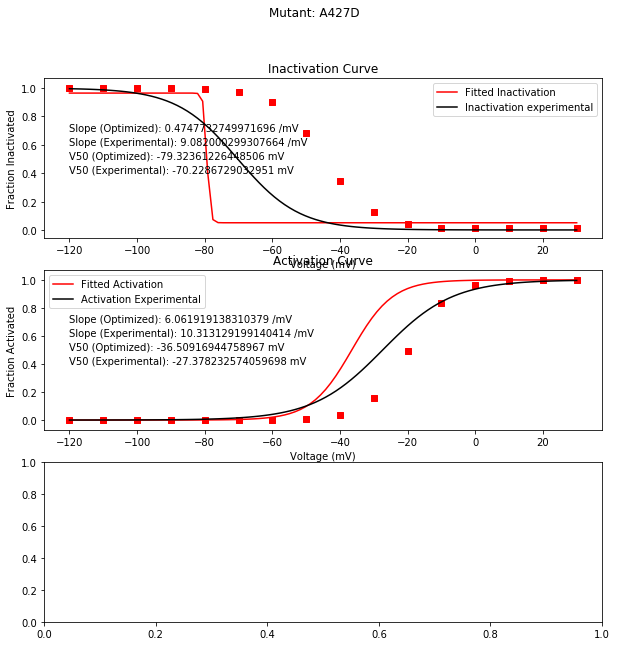

In [13]:
evaluator.plot_data([403.4467086298346, 0.01137826645034117, 0.1183338840265211, 0.8516523755561086, 113.81455889813745, 0.03987484408697367, 4.910585032600074, 0.5949813764091713, 507.69780451583034, 0.33877907608887947, 2.8933969415609195, 0.12894200991124913, 6.048141227008678, 1.9577501019052863, 0.3052931339297083, 1.1641023082215742, 184.62880172763454, 0.1793790140124973, 5.921453461663031, 9.995998444736031], 'A427D')

In [3]:
best_indvs = [[58.30035693274327, 1.7330556641407107, -1.956314890670824, 1.0008060614355943, 4.2247900083185765, 0.0005307888382927407, 0.2528382057960039, 0.9000225798255164, -4.634741698486584, 6.04876972220221, 4.974042475543028, 1.6822064984267422, 0.37975555118428816, 9.527026622992052, 12.030407620656316, 9.744858305023271, -46.2529697949836, -45.61038369955437, -44.91573511750018, -27.215573849998542, 2.2093841761314517, -59.06744905035774, -60.10306479537742, 7.29574963966907], [58.30035693274327, 1.7330556641407107, -1.956314890670824, 1.0008060614355943, 4.2247900083185765, 0.0005307888382927407, 0.2528382057960039, 0.9000225798255164, -4.634741698486584, 6.04876972220221, 4.974042475543028, 1.6822064984267422, 0.37975555118428816, 9.527026622992052, 12.030407620656316, 9.744858305023271, -46.2529697949836, -45.61038369955437, -44.91573511750018, -27.215573849998542, 2.2093841761314517, -59.06744905035774, -60.10306479537742, 7.29574963966907], [58.30035693274327, 1.7330556641407107, -1.956314890670824, 1.0008060614355943, 4.2247900083185765, 0.0005307888382927407, 0.2528382057960039, 0.9000225798255164, -4.634741698486584, 6.04876972220221, 4.974042475543028, 1.6822064984267422, 0.37975555118428816, 9.527026622992052, 12.030407620656316, 9.744858305023271, -46.2529697949836, -45.61038369955437, -44.91573511750018, -27.215573849998542, 2.2093841761314517, -59.06744905035774, -60.10306479537742, 7.29574963966907], [58.57211136879646, -2.99141591696617, 0.4378525833750069, 1.3152139966092369, 3.407512894405712, 0.00039232594554019953, 3.647091945876057, 2.0374341363388773, -1.2552309484601791, 6.499547270129048, 3.6594342643057733, 2.970378042337644, 0.538845865097282, 11.864134037922364, 14.960382314970357, 10.228341283797056, -46.75605328096658, -44.36395908654087, -49.545939608138426, -26.702830052604146, -0.9116486232444663, -58.379093967497, -63.063418171368355, 15.102029533838506], [52.50593018674539, 3.9728180160307236, 2.809219790589104, 1.0253410244973744, 2.0412737504373086, 0.00026301309314909275, -2.961395756010794, 2.2957609078361942, -4.726435991545121, 6.363227803228395, 2.975427210303446, 2.9243730632630283, 0.2922326119081728, 11.440412845050787, 13.736821089614583, 6.1554105974258375, -44.615091655881585, -47.47563437235654, -49.75724257317084, -31.969156188925584, 3.9849181721640594, -59.74854977192689, -63.37242730765314, 8.405977477110621], [52.50593018674539, 3.9728180160307236, 2.809219790589104, 1.0253410244973744, 2.0412737504373086, 0.00026301309314909275, -2.961395756010794, 2.2957609078361942, -4.726435991545121, 6.363227803228395, 2.975427210303446, 2.9243730632630283, 0.2922326119081728, 11.440412845050787, 13.736821089614583, 6.1554105974258375, -44.615091655881585, -47.47563437235654, -49.75724257317084, -31.969156188925584, 3.9849181721640594, -59.74854977192689, -63.37242730765314, 8.405977477110621], [52.50593018674539, 3.9728180160307236, 2.809219790589104, 1.0253410244973744, 2.0412737504373086, 0.00026301309314909275, -2.961395756010794, 2.2957609078361942, -4.726435991545121, 6.363227803228395, 2.975427210303446, 2.9243730632630283, 0.2922326119081728, 11.440412845050787, 13.736821089614583, 6.1554105974258375, -44.615091655881585, -47.47563437235654, -49.75724257317084, -31.969156188925584, 3.9849181721640594, -59.74854977192689, -63.37242730765314, 8.405977477110621], [58.90312980960611, -0.08846235706475225, 2.2700143250806932, 1.5797403454541354, 3.455674988160199, 0.0003516960089202955, -3.9816268481557073, 4.2926547109058095, 3.3486172619819206, 6.403414085306484, 4.7537880368529555, 2.951914516118788, 0.7228895509575473, 11.572045913231232, 14.114600706350043, 5.14402312650676, -46.83916942143177, -46.30465738156748, -48.43978047769934, -26.26972941346428, 3.2512546173197405, -62.57215812363639, -57.81416438722742, 8.354541422632291], [58.90312980960611, -0.08846235706475225, 2.2700143250806932, 1.5797403454541354, 3.455674988160199, 0.0003516960089202955, -3.9816268481557073, 4.2926547109058095, 3.3486172619819206, 6.403414085306484, 4.7537880368529555, 2.951914516118788, 0.7228895509575473, 11.572045913231232, 14.114600706350043, 5.14402312650676, -46.83916942143177, -46.30465738156748, -48.43978047769934, -26.26972941346428, 3.2512546173197405, -62.57215812363639, -57.81416438722742, 8.354541422632291], [58.90312980960611, -0.08846235706475225, 2.2700143250806932, 1.5797403454541354, 3.455674988160199, 0.0003516960089202955, -3.9816268481557073, 4.2926547109058095, 3.3486172619819206, 6.403414085306484, 4.7537880368529555, 2.951914516118788, 0.7228895509575473, 11.572045913231232, 14.114600706350043, 5.14402312650676, -46.83916942143177, -46.30465738156748, -48.43978047769934, -26.26972941346428, 3.2512546173197405, -62.57215812363639, -57.81416438722742, 8.354541422632291], [58.90312980960611, -0.08846235706475225, 2.2700143250806932, 1.5797403454541354, 3.455674988160199, 0.0003516960089202955, -3.9816268481557073, 4.2926547109058095, 3.3486172619819206, 6.403414085306484, 4.7537880368529555, 2.951914516118788, 0.7228895509575473, 11.572045913231232, 14.114600706350043, 5.14402312650676, -46.83916942143177, -46.30465738156748, -48.43978047769934, -26.26972941346428, 3.2512546173197405, -62.57215812363639, -57.81416438722742, 8.354541422632291], [58.90312980960611, -0.08846235706475225, 2.2700143250806932, 1.5797403454541354, 3.455674988160199, 0.0003516960089202955, -3.9816268481557073, 4.2926547109058095, 3.3486172619819206, 6.403414085306484, 4.7537880368529555, 2.951914516118788, 0.7228895509575473, 11.572045913231232, 14.114600706350043, 5.14402312650676, -46.83916942143177, -46.30465738156748, -48.43978047769934, -26.26972941346428, 3.2512546173197405, -62.57215812363639, -57.81416438722742, 8.354541422632291], [58.90312980960611, -0.08846235706475225, 2.2700143250806932, 1.5797403454541354, 3.455674988160199, 0.0003516960089202955, -3.9816268481557073, 4.2926547109058095, 3.3486172619819206, 6.403414085306484, 4.7537880368529555, 2.951914516118788, 0.7228895509575473, 11.572045913231232, 14.114600706350043, 5.14402312650676, -46.83916942143177, -46.30465738156748, -48.43978047769934, -26.26972941346428, 3.2512546173197405, -62.57215812363639, -57.81416438722742, 8.354541422632291], [58.90312980960611, -0.08846235706475225, 2.2700143250806932, 1.5797403454541354, 3.455674988160199, 0.0003516960089202955, -3.9816268481557073, 4.2926547109058095, 3.3486172619819206, 6.403414085306484, 4.7537880368529555, 2.951914516118788, 0.7228895509575473, 11.572045913231232, 14.114600706350043, 5.14402312650676, -46.83916942143177, -46.30465738156748, -48.43978047769934, -26.26972941346428, 3.2512546173197405, -62.57215812363639, -57.81416438722742, 8.354541422632291], [58.90312980960611, -0.08846235706475225, 2.2700143250806932, 1.5797403454541354, 3.455674988160199, 0.0003516960089202955, -3.9816268481557073, 4.2926547109058095, 3.3486172619819206, 6.403414085306484, 4.7537880368529555, 2.951914516118788, 0.7228895509575473, 11.572045913231232, 14.114600706350043, 5.14402312650676, -46.83916942143177, -46.30465738156748, -48.43978047769934, -26.26972941346428, 3.2512546173197405, -62.57215812363639, -57.81416438722742, 8.354541422632291], [58.90312980960611, -0.08846235706475225, 2.2700143250806932, 1.5797403454541354, 3.455674988160199, 0.0003516960089202955, -3.9816268481557073, 4.2926547109058095, 3.3486172619819206, 6.403414085306484, 4.7537880368529555, 2.951914516118788, 0.7228895509575473, 11.572045913231232, 14.114600706350043, 5.14402312650676, -46.83916942143177, -46.30465738156748, -48.43978047769934, -26.26972941346428, 3.2512546173197405, -62.57215812363639, -57.81416438722742, 8.354541422632291], [58.90312980960611, -0.08846235706475225, 2.2700143250806932, 1.5797403454541354, 3.455674988160199, 0.0003516960089202955, -3.9816268481557073, 4.2926547109058095, 3.3486172619819206, 6.403414085306484, 4.7537880368529555, 2.951914516118788, 0.7228895509575473, 11.572045913231232, 14.114600706350043, 5.14402312650676, -46.83916942143177, -46.30465738156748, -48.43978047769934, -26.26972941346428, 3.2512546173197405, -62.57215812363639, -57.81416438722742, 8.354541422632291], [58.90312980960611, -0.08846235706475225, 2.2700143250806932, 1.5797403454541354, 3.455674988160199, 0.0003516960089202955, -3.9816268481557073, 4.2926547109058095, 3.3486172619819206, 6.403414085306484, 4.7537880368529555, 2.951914516118788, 0.7228895509575473, 11.572045913231232, 14.114600706350043, 5.14402312650676, -46.83916942143177, -46.30465738156748, -48.43978047769934, -26.26972941346428, 3.2512546173197405, -62.57215812363639, -57.81416438722742, 8.354541422632291], [58.90312980960611, -0.08846235706475225, 2.2700143250806932, 1.5797403454541354, 3.455674988160199, 0.0003516960089202955, -3.9816268481557073, 4.2926547109058095, 3.3486172619819206, 6.403414085306484, 4.7537880368529555, 2.951914516118788, 0.7228895509575473, 11.572045913231232, 14.114600706350043, 5.14402312650676, -46.83916942143177, -46.30465738156748, -48.43978047769934, -26.26972941346428, 3.2512546173197405, -62.57215812363639, -57.81416438722742, 8.354541422632291], [58.90312980960611, -0.08846235706475225, 2.2700143250806932, 1.5797403454541354, 3.455674988160199, 0.0003516960089202955, -3.9816268481557073, 4.2926547109058095, 3.3486172619819206, 6.403414085306484, 4.7537880368529555, 2.951914516118788, 0.7228895509575473, 11.572045913231232, 14.114600706350043, 5.14402312650676, -46.83916942143177, -46.30465738156748, -48.43978047769934, -26.26972941346428, 3.2512546173197405, -62.57215812363639, -57.81416438722742, 8.354541422632291], [58.90312980960611, -0.08846235706475225, 2.2700143250806932, 1.5797403454541354, 3.455674988160199, 0.0003516960089202955, -3.9816268481557073, 4.2926547109058095, 3.3486172619819206, 6.403414085306484, 4.7537880368529555, 2.951914516118788, 0.7228895509575473, 11.572045913231232, 14.114600706350043, 5.14402312650676, -46.83916942143177, -46.30465738156748, -48.43978047769934, -26.26972941346428, 3.2512546173197405, -62.57215812363639, -57.81416438722742, 8.354541422632291], [58.90312980960611, -0.08846235706475225, 2.2700143250806932, 1.5797403454541354, 3.455674988160199, 0.0003516960089202955, -3.9816268481557073, 4.2926547109058095, 3.3486172619819206, 6.403414085306484, 4.7537880368529555, 2.951914516118788, 0.7228895509575473, 11.572045913231232, 14.114600706350043, 5.14402312650676, -46.83916942143177, -46.30465738156748, -48.43978047769934, -26.26972941346428, 3.2512546173197405, -62.57215812363639, -57.81416438722742, 8.354541422632291], [58.90312980960611, -0.08846235706475225, 2.2700143250806932, 1.5797403454541354, 3.455674988160199, 0.0003516960089202955, -3.9816268481557073, 4.2926547109058095, 3.3486172619819206, 6.403414085306484, 4.7537880368529555, 2.951914516118788, 0.7228895509575473, 11.572045913231232, 14.114600706350043, 5.14402312650676, -46.83916942143177, -46.30465738156748, -48.43978047769934, -26.26972941346428, 3.2512546173197405, -62.57215812363639, -57.81416438722742, 8.354541422632291], [58.90312980960611, -0.08846235706475225, 2.2700143250806932, 1.5797403454541354, 3.455674988160199, 0.0003516960089202955, -3.9816268481557073, 4.2926547109058095, 3.3486172619819206, 6.403414085306484, 4.7537880368529555, 2.951914516118788, 0.7228895509575473, 11.572045913231232, 14.114600706350043, 5.14402312650676, -46.83916942143177, -46.30465738156748, -48.43978047769934, -26.26972941346428, 3.2512546173197405, -62.57215812363639, -57.81416438722742, 8.354541422632291], [58.90312980960611, -0.08846235706475225, 2.2700143250806932, 1.5797403454541354, 3.455674988160199, 0.0003516960089202955, -3.9816268481557073, 4.2926547109058095, 3.3486172619819206, 6.403414085306484, 4.7537880368529555, 2.951914516118788, 0.7228895509575473, 11.572045913231232, 14.114600706350043, 5.14402312650676, -46.83916942143177, -46.30465738156748, -48.43978047769934, -26.26972941346428, 3.2512546173197405, -62.57215812363639, -57.81416438722742, 8.354541422632291]]

In [4]:
len(best_indvs)

25

Generation: 1


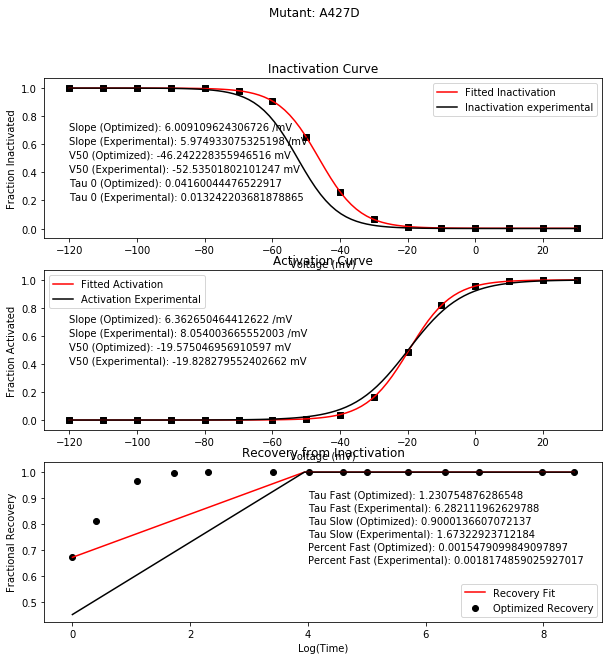

Generation: 2


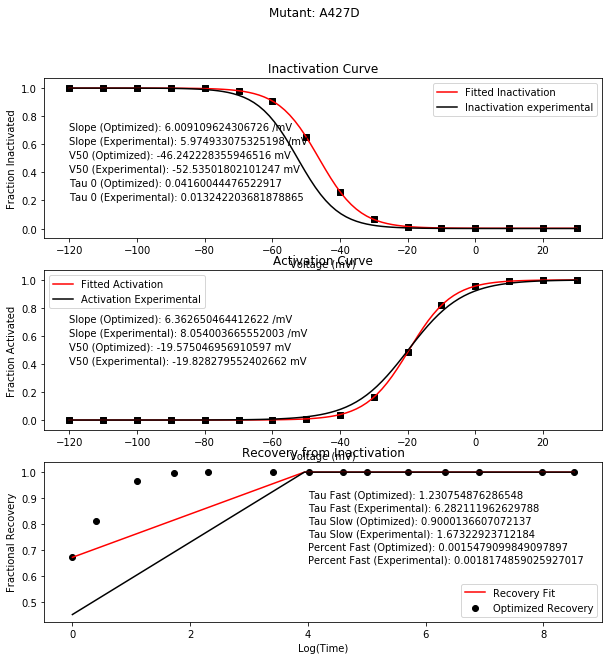

Generation: 3


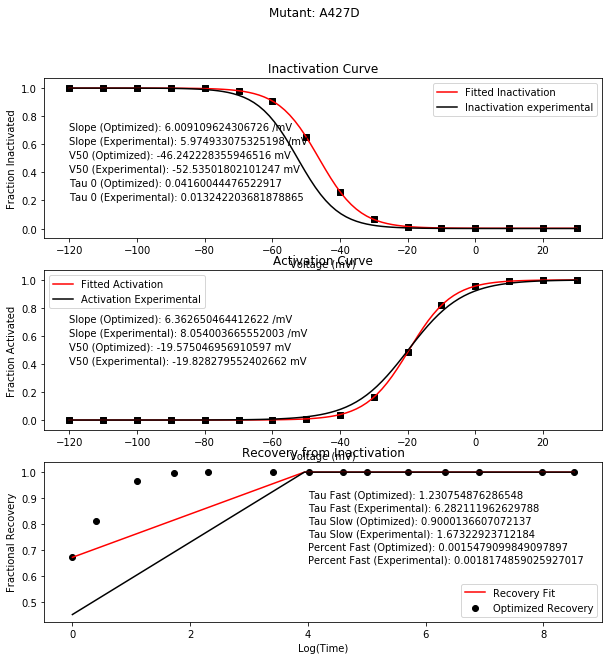

Generation: 4


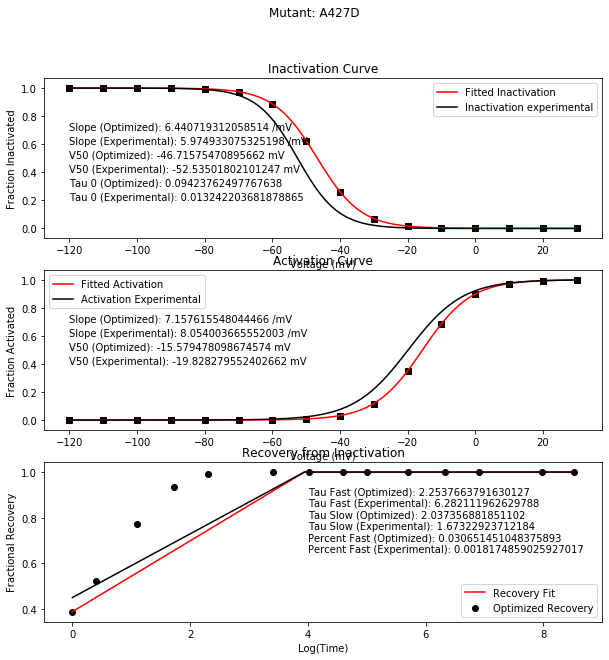

Generation: 5


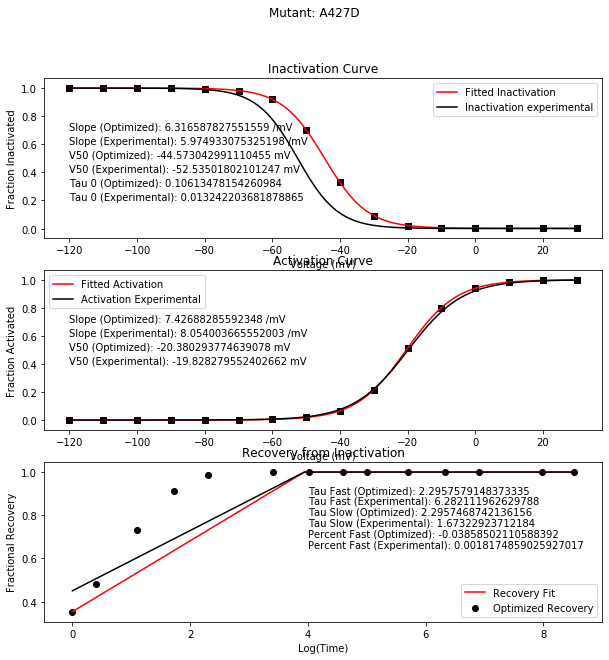

Generation: 6


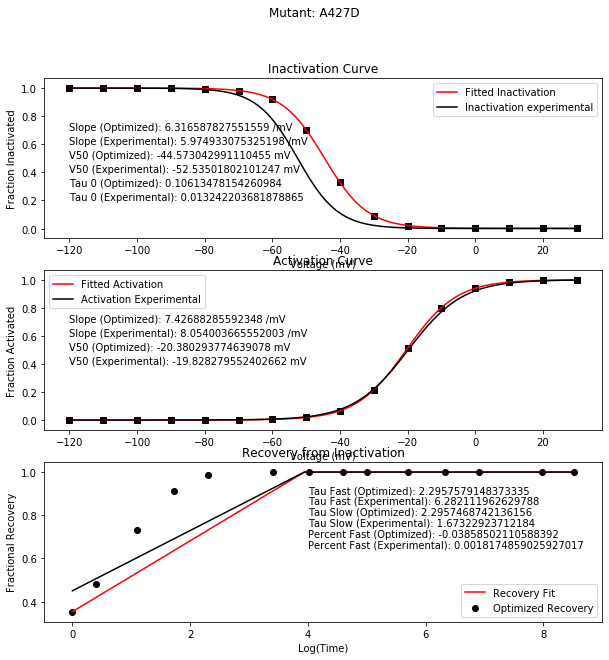

Generation: 7


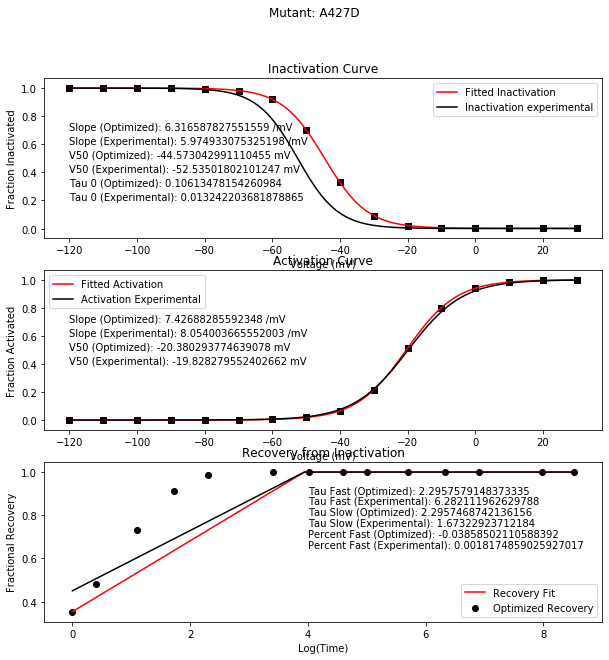

Generation: 8


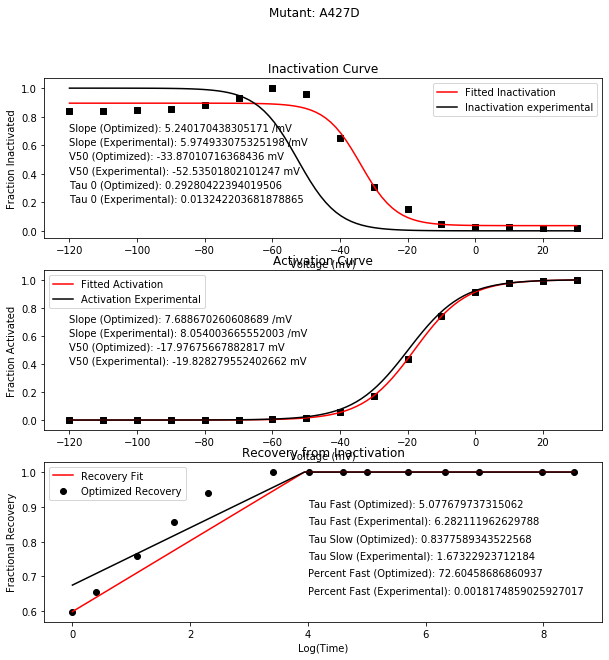

Generation: 9


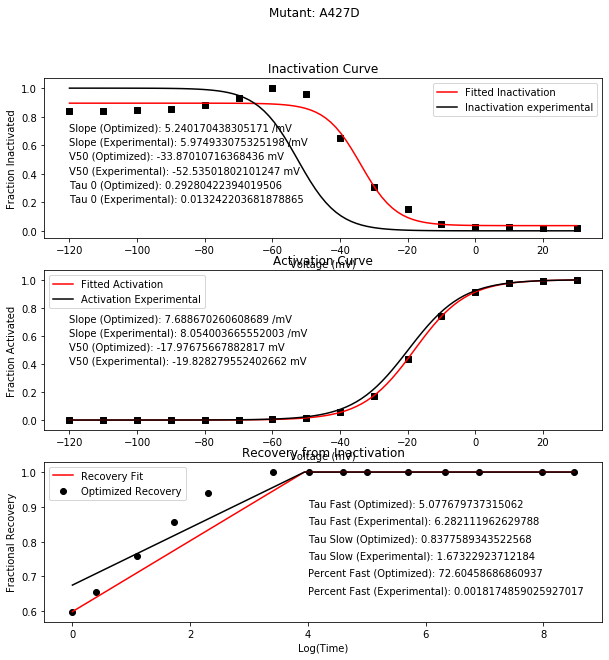

Generation: 10


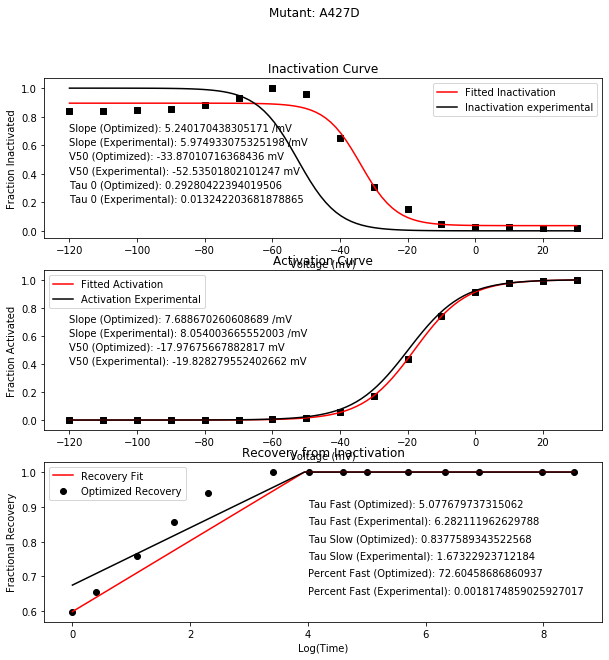

Generation: 11


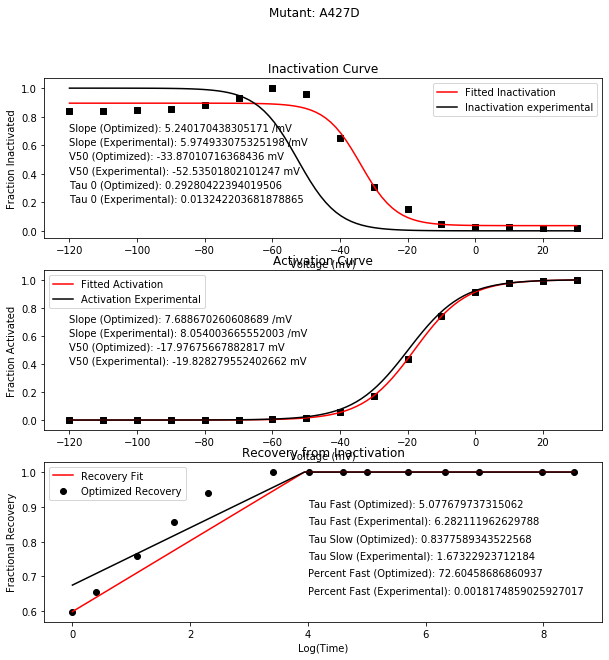

Generation: 12


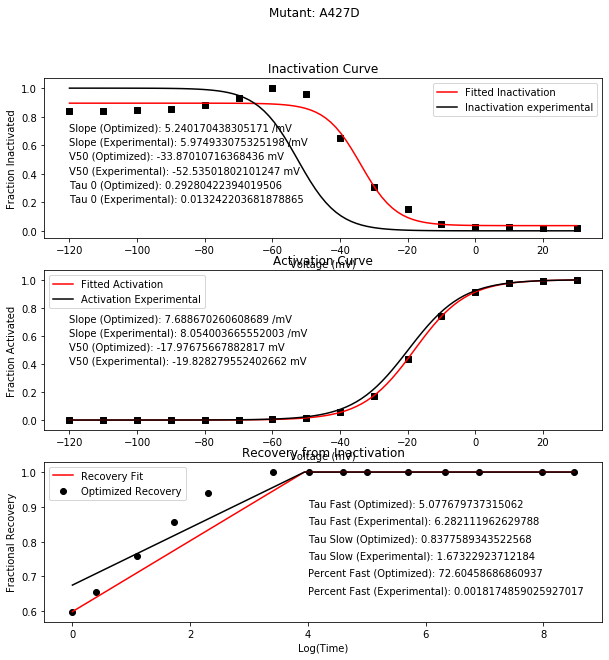

Generation: 13


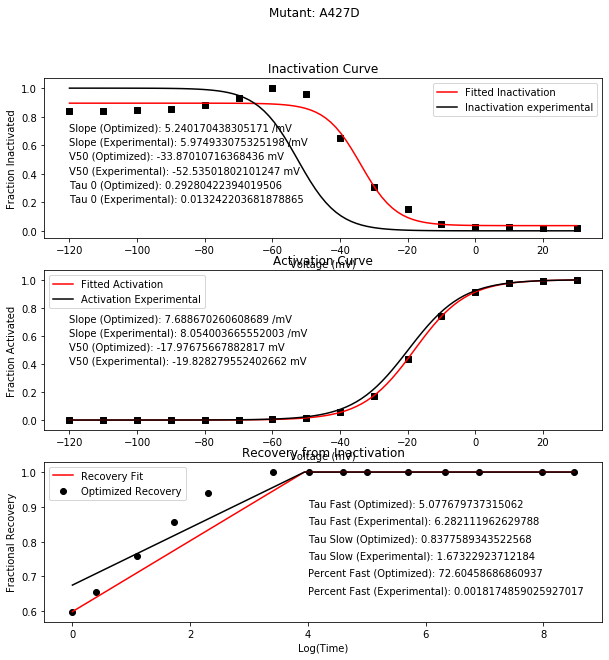

Generation: 14


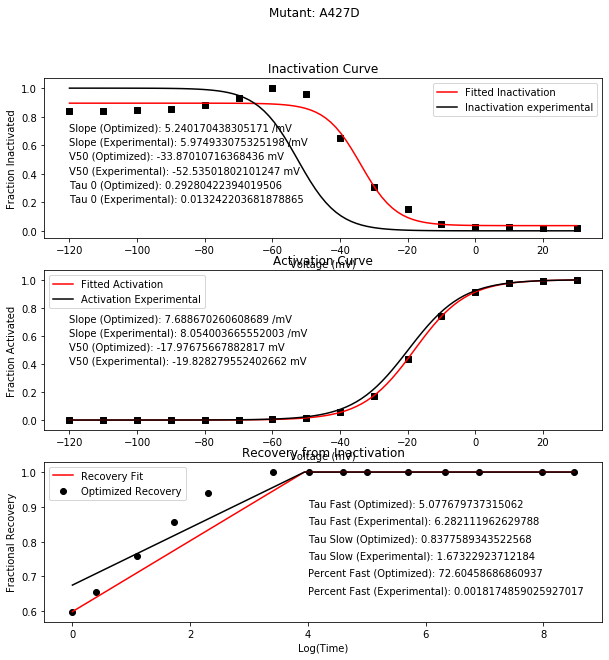

Generation: 15


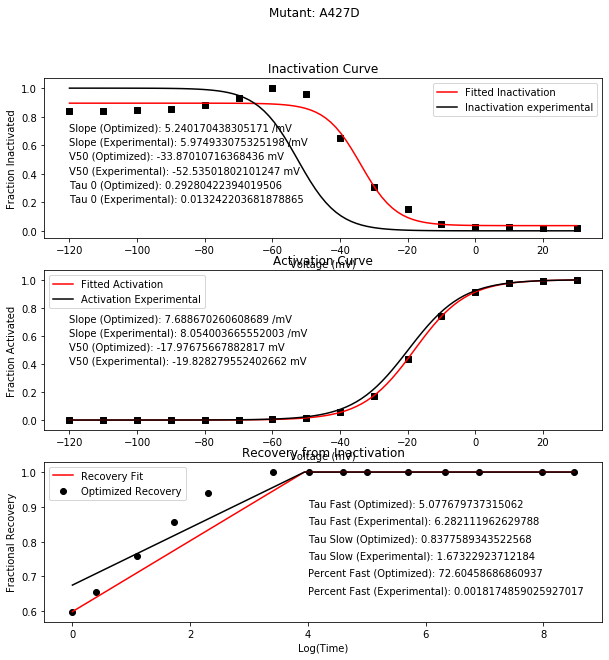

Generation: 16


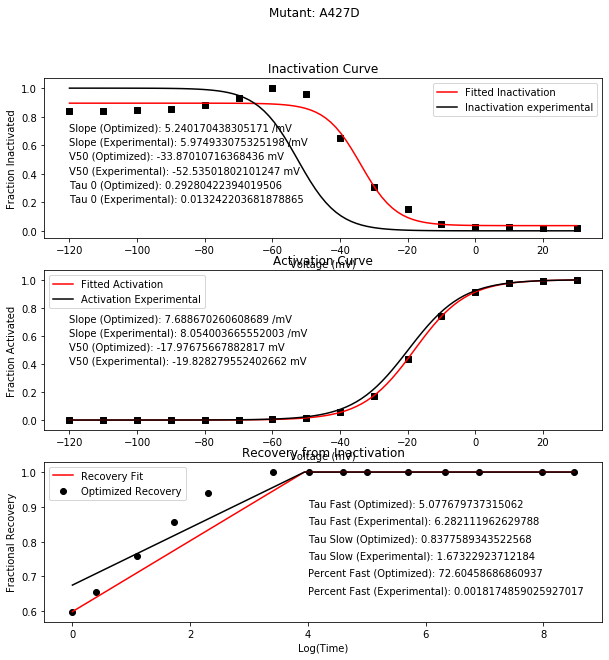

Generation: 17


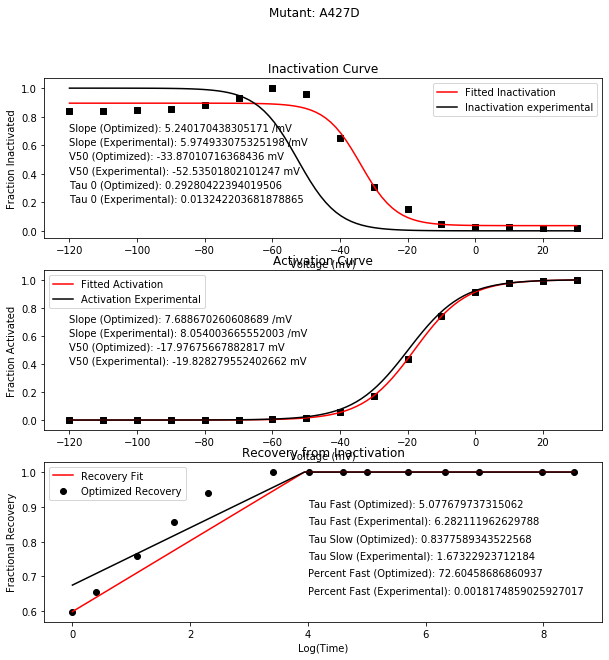

Generation: 18


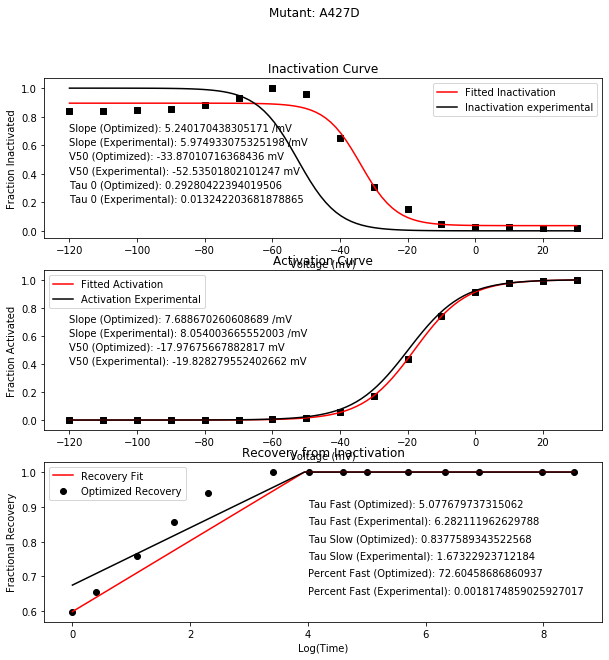

Generation: 19


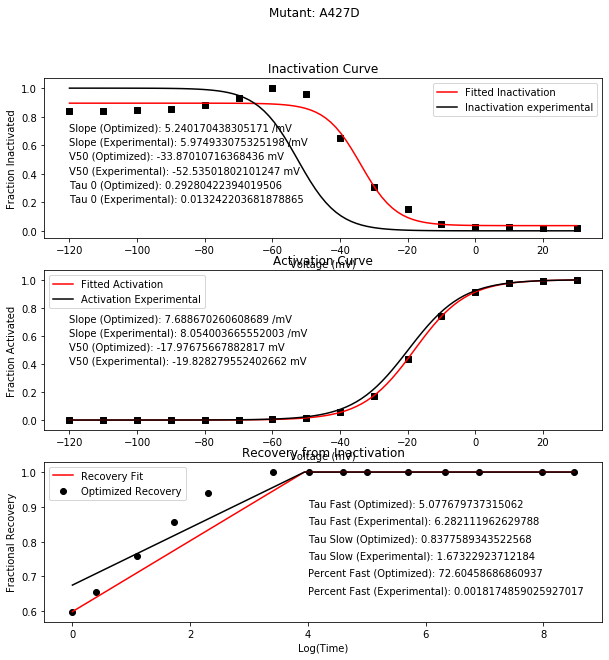

Generation: 20


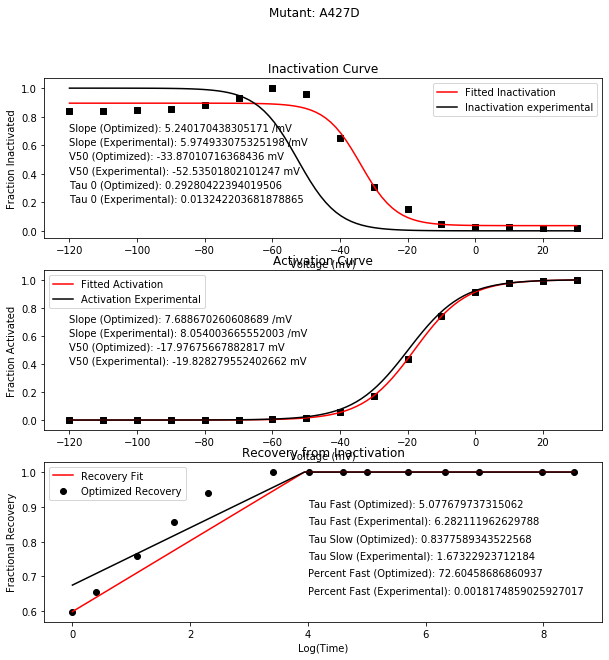

Generation: 21


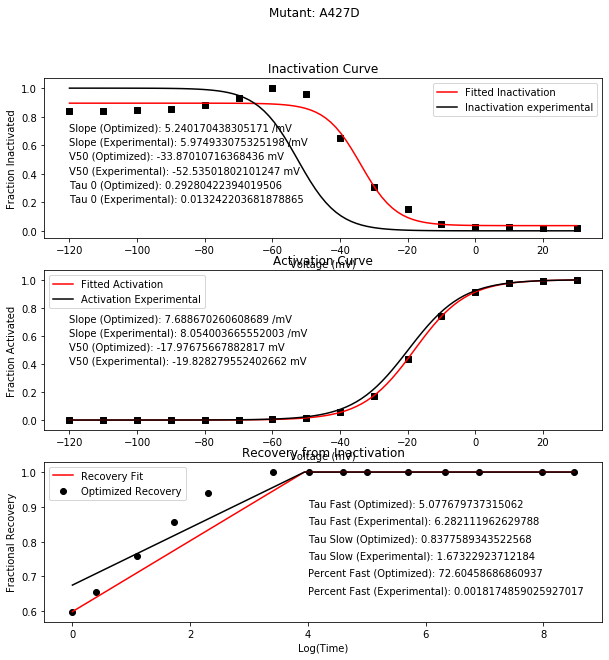

Generation: 22


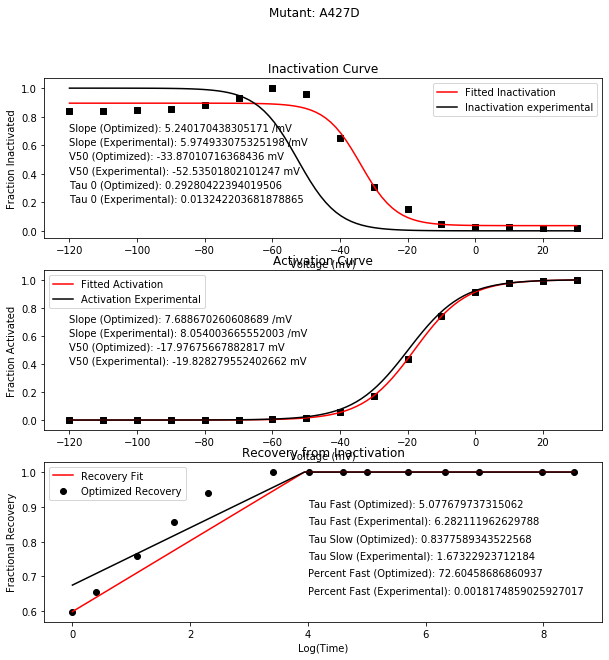

Generation: 23


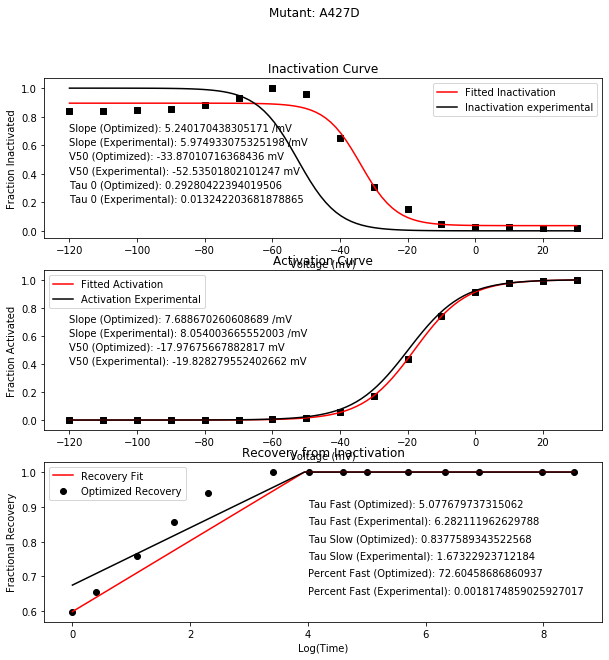

Generation: 24


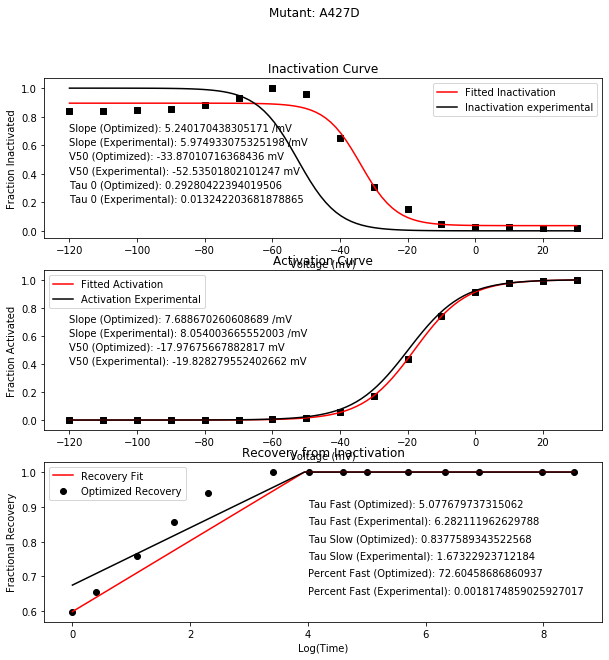

Generation: 25


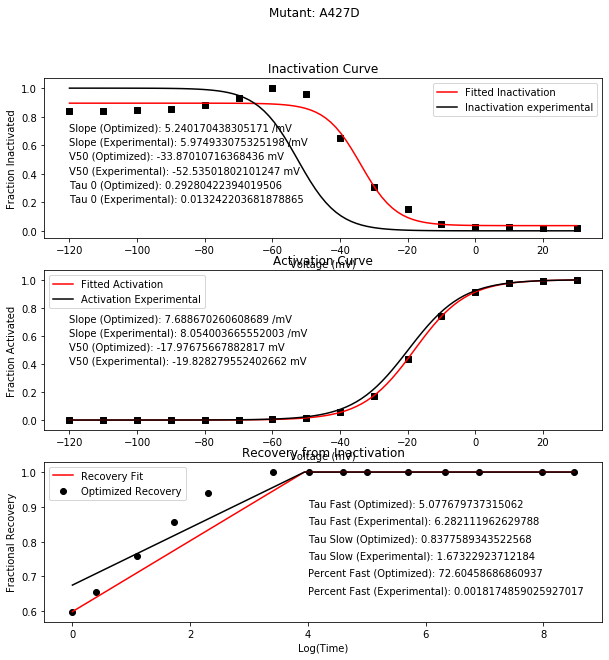

In [6]:
for i in range(1, 26):
    print('Generation: ' + str(i))
    evaluator.plot_data(best_indvs[i - 1], 'A427D')